In [17]:
#!pip install PyPDF2
#!pip install nltk
#!pip install clean-text
#!pip install gensim
#!pip install pyLDAvis
#!pip install wordcloud

In [18]:
import nltk
'''
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
'''

"\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('omw-1.4')\n"

In [19]:
'''
import urllib.request
import zipfile

urllib.request.urlretrieve(r'http://nlp.stanford.edu/software/stanford-postagger-full-2015-04-20.zip', r'C:\canada\document_matching\stanford-postagger-full-2015-04-20.zip')

zfile = zipfile.ZipFile(r'C:\canada\document_matching\stanford-postagger-full-2015-04-20.zip')

zfile.extractall(r'C:\canada\document_matching\stanford-pos')
'''

<>:1: DeprecationWarning: invalid escape sequence \c
<>:1: DeprecationWarning: invalid escape sequence \c
C:\Users\Марія\AppData\Local\Temp\ipykernel_5216\29238159.py:1: DeprecationWarning: invalid escape sequence \c
  '''


"\nimport urllib.request\nimport zipfile\n\nurllib.request.urlretrieve(r'http://nlp.stanford.edu/software/stanford-postagger-full-2015-04-20.zip', r'C:\\canada\\document_matching\\stanford-postagger-full-2015-04-20.zip')\n\nzfile = zipfile.ZipFile(r'C:\\canada\\document_matching\\stanford-postagger-full-2015-04-20.zip')\n\nzfile.extractall(r'C:\\canada\\document_matching\\stanford-pos')\n"

<h3> Data extraction and cleaning (PDF) </h3>

In [2]:
from utils.file_reader import PdfParser


pathes = ["source_materials/ARIA_2021_Brochure.pdf","source_materials/ARIA_Program_2020.pdf"]
pages = [[i for i in range(11, 72)], [i for i in range(8, 55)]]
data = []
for i in range(len(pathes)):
    p = PdfParser(pages[i], pathes[i]) 
    data = data + p.get_parsed_data()

In [3]:
import pandas as pd
from utils.cleaner import TextCleaner

tc = TextCleaner()

In [4]:
t = pd.read_excel('source_materials/mitacs-cs-projects-20220609-2116.xlsx')
t = t.drop(['project-link-url', 'pagination-url', 'web-scraper-order'], axis=1)
t = t.rename(columns={"project-title": "title", "project-description": "abstract", 'faculty-supervisor': 'supervisor', "academic-institution": 'company'})
t['title'] = t['title'].apply(lambda x: tc.text_cleaning(x))
t.dropna(subset = ['abstract'], inplace=True)
t['abstract'] = t['abstract'].apply(lambda x: tc.text_cleaning(x))
columns_titles = ['title', 'abstract',"supervisor",  "company"]
t=t.reindex(columns=columns_titles)
t

,title,abstract,supervisor,company
0,using technology for curriculumbased measureme...,we do not have an effective canadian curriculu...,Janet Werker;Carrie Demmans Epp,NaN
1,food convergent innovation canada startupdevel...,food convergence and integrity fci canada is b...,R. Sandra Schillo;Laurette Dube;Jian-Yun Nie;A...,NaN
2,development of an alcontrolled closedloop neur...,the treatment of chronic conditions accounted ...,Blake Richards;Guillaume Lajoie,NaN
3,automatic generation of career advice articles,indeedcom is a wellknown employmentrelated sea...,Fatemeh Hendijani Fard,NaN
4,mental wellness application for current and po...,people who experience mental wellness challeng...,Terry Peckham;Susan Blum;Raymond Spiteri,NaN
...,...,...,...,...
1047,multilingual semantic similarity of unstructur...,to communicate with their end users businesses...,Robert Mercer,Western University
1048,multilingual semantic search engine using mult...,multiple situations require crosslingual searc...,Robert Mercer,Western University
1049,revealing trends in quantum technology with na...,recent years have witnessed a surge of interes...,Yang Liu;Xu Sunny Wang,Wilfrid Laurier University
1050,adding extra constraints to an open platform f...,acculogic develops stateoftheart testers for s...,Dr. Stephen Chen,York University


In [5]:
df = pd.DataFrame(data)
df.head()

,title,abstract,supervisor,company
0,adapting contextual bandit algorithms to adser...,contextual bandit algorithms are developed to ...,Leonard Wong,[24]7.ai
1,defending white box adversarial examples with ...,as deep neural networks become increasingly co...,Gennady Pekhimenko,AMD
2,modern gameplay test automation with reinforce...,gameplay testing on computer games to help ens...,Amir-massoud Farahmand,AMD
3,reducing data loading time in machine learning...,training of models in machine learning is typi...,Maryam Mehri Dehnavi,AMD
4,hybrid recommender system for applications bas...,collaborative filtering is a widely used metho...,Peter Marbach,AppDirect


In [6]:
frames = [df, t]
  
df = pd.concat(frames)
df = df.reset_index()
df

,index,title,abstract,supervisor,company
0,0,adapting contextual bandit algorithms to adser...,contextual bandit algorithms are developed to ...,Leonard Wong,[24]7.ai
1,1,defending white box adversarial examples with ...,as deep neural networks become increasingly co...,Gennady Pekhimenko,AMD
2,2,modern gameplay test automation with reinforce...,gameplay testing on computer games to help ens...,Amir-massoud Farahmand,AMD
3,3,reducing data loading time in machine learning...,training of models in machine learning is typi...,Maryam Mehri Dehnavi,AMD
4,4,hybrid recommender system for applications bas...,collaborative filtering is a widely used metho...,Peter Marbach,AppDirect
...,...,...,...,...,...
1113,1047,multilingual semantic similarity of unstructur...,to communicate with their end users businesses...,Robert Mercer,Western University
1114,1048,multilingual semantic search engine using mult...,multiple situations require crosslingual searc...,Robert Mercer,Western University
1115,1049,revealing trends in quantum technology with na...,recent years have witnessed a surge of interes...,Yang Liu;Xu Sunny Wang,Wilfrid Laurier University
1116,1050,adding extra constraints to an open platform f...,acculogic develops stateoftheart testers for s...,Dr. Stephen Chen,York University


In [7]:
titles = pd.Series(df['title'])

In [155]:
abstracts = pd.Series(df['abstract'])
abstracts_const = pd.Series(df['abstract'])
abstracts

0       contextual bandit algorithms are developed to ...
1       as deep neural networks become increasingly co...
2       gameplay testing on computer games to help ens...
3       training of models in machine learning is typi...
4       collaborative filtering is a widely used metho...
                              ...                        
1113    to communicate with their end users businesses...
1114    multiple situations require crosslingual searc...
1115    recent years have witnessed a surge of interes...
1116    acculogic develops stateoftheart testers for s...
1117    casebank provides a service called chronicx to...
Name: abstract, Length: 1118, dtype: object

In [156]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

In [157]:
import re
f = open("additional_stop_words.txt", "r")
more_stop_words = f.readlines()
for i in more_stop_words:
    t = i.split()
    stopwords.update(t)

In [158]:
abstracts = abstracts.apply(lambda x : " ".join(word for word in x.split() if word not in stopwords))
abstracts


0       contextual bandit algorithms developed gain ma...
1       deep neural networks increasingly common secur...
2       gameplay testing computer games ensure high pe...
3       training models machine learning typically div...
4       collaborative filtering widely method recommen...
                              ...                        
1113    communicate end users businesses regularly pro...
1114    multiple situations require crosslingual searc...
1115    recent years witnessed surge interests explori...
1116    acculogic develops stateoftheart testers short...
1117    casebank service called chronicx airline indus...
Name: abstract, Length: 1118, dtype: object

In [159]:
abstracts = abstracts.apply(lambda x: x.split())

In [160]:
from nltk.tag import StanfordPOSTagger

jar = r'C:\canada\document_matching\stanford-pos\stanford-postagger-full-2015-04-20\stanford-postagger.jar'
model = r'C:\canada\document_matching\stanford-pos\stanford-postagger-full-2015-04-20\models\english-left3words-distsim.tagger'

stg = StanfordPOSTagger(path_to_jar=jar, model_filename=model)


In [161]:
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
dict_pos_map = {
    'NN': NOUN,
    'JJ' : ADJ  
}

In [162]:
abstracts

0       [contextual, bandit, algorithms, developed, ga...
1       [deep, neural, networks, increasingly, common,...
2       [gameplay, testing, computer, games, ensure, h...
3       [training, models, machine, learning, typicall...
4       [collaborative, filtering, widely, method, rec...
                              ...                        
1113    [communicate, end, users, businesses, regularl...
1114    [multiple, situations, require, crosslingual, ...
1115    [recent, years, witnessed, surge, interests, e...
1116    [acculogic, develops, stateoftheart, testers, ...
1117    [casebank, service, called, chronicx, airline,...
Name: abstract, Length: 1118, dtype: object

In [163]:
from nltk import WordNetLemmatizer

lm = WordNetLemmatizer()
adjectives = []
def lemmatizer_on_text(data):    
    data = stg.tag(data) 
    text = []
    for i in range(len(data)):
        if data[i][1] == 'JJ':
            adjectives.append(data[i][0])
        if dict_pos_map.get(data[i][1][:2]) != None:
            if data[i][0] in ['app', 'apps', 'application']:
                text.append('app')
            else:
                text.append(lm.lemmatize(data[i][0], dict_pos_map[data[i][1][:2]]))
    return text

In [34]:
data = stg.tag(['developed'])
data

[('developed', 'VBN')]

In [164]:
abstracts = abstracts.apply(lambda x: lemmatizer_on_text(x))
abstracts

0       [contextual, bandit, algorithm, gain, maximum,...
1       [deep, neural, network, common, security, cons...
2       [gameplay, testing, computer, game, high, perf...
3       [training, model, machine, dataset, subset, mi...
4       [collaborative, method, recommendation, task, ...
                              ...                        
1113    [end, user, business, document, letter, notice...
1114    [multiple, situation, crosslingual, lawyer, li...
1115    [recent, year, surge, interest, research, dire...
1116    [acculogic, stateoftheart, tester, electronic,...
1117    [casebank, service, chronicx, airline, industr...
Name: abstract, Length: 1118, dtype: object

In [11]:
def replace_ngram(x, ngram_array):
    for gram in ngram_array:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [167]:
abstracts

0       [contextual, bandit, algorithm, gain, maximum,...
1       [deep, neural, network, common, security, cons...
2       [gameplay, testing, computer, game, high, perf...
3       [training, model, machine, dataset, subset, mi...
4       [collaborative, method, recommendation, task, ...
                              ...                        
1113    [end, user, business, document, letter, notice...
1114    [multiple, situation, crosslingual, lawyer, li...
1115    [recent, year, surge, interest, research, dire...
1116    [acculogic, stateoftheart, tester, electronic,...
1117    [casebank, service, chronicx, airline, industr...
Name: abstract, Length: 1118, dtype: object

In [6]:

f = open('lemmatized_text.txt', 'r')
u = f.readlines()
abstracts = []
for i in u:
    abstracts.append(i.split())
abstracts = pd.Series(abstracts)
f.close()


NameError: name 'pd' is not defined

In [24]:
abstracts

0       [contextual, bandit, algorithm, gain, maximum,...
1       [deep, neural, network, common, security, cons...
2       [gameplay, testing, computer, game, high, perf...
3       [training, model, machine, dataset, subset, mi...
4       [collaborative, method, recommendation, task, ...
                              ...                        
1113    [end, user, business, document, letter, notice...
1114    [multiple, situation, crosslingual, lawyer, li...
1115    [recent, year, surge, interest, research, dire...
1116    [acculogic, stateoftheart, tester, electronic,...
1117    [casebank, service, chronicx, airline, industr...
Length: 1118, dtype: object

In [9]:
f = open('adjectives.txt', 'r')
u = f.readlines()
adjectives = []
for i in u:
    adjectives.append(i)
adjectives = [x.rstrip('\n') for x in adjectives]
f.close()

In [10]:
import pandas as pd
abstracts = pd.Series(abstracts)

In [10]:
abstracts

0       [contextual, bandit, algorithm, gain, maximum,...
1       [deep, neural, network, common, security, cons...
2       [gameplay, testing, computer, game, high, perf...
3       [training, model, machine, dataset, subset, mi...
4       [collaborative, method, recommendation, task, ...
                              ...                        
1113    [end, user, business, document, letter, notice...
1114    [multiple, situation, crosslingual, lawyer, li...
1115    [recent, year, surge, interest, research, dire...
1116    [acculogic, stateoftheart, tester, electronic,...
1117    [casebank, service, chronicx, airline, industr...
Length: 1118, dtype: object

<h3> EDA </h3>

In [12]:
vocab = set()
words_frequences = {}

In [13]:
import nltk

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder =nltk.collocations.BigramCollocationFinder.from_documents(abstracts)
finder.apply_freq_filter(30)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigrams = [" ".join(list(bigram[0])) for bigram in bigram_scores]
bigram_scores

[(('artificial', 'intelligence'), 9.057004536524708),
 (('natural', 'language'), 8.253306107171937),
 (('computer', 'vision'), 7.854722063429296),
 (('industrial', 'partner'), 7.528845121875804),
 (('partner', 'organization'), 7.30017951059285),
 (('neural', 'network'), 7.193861073502276),
 (('deep', 'learning'), 6.952254125723442),
 (('language', 'processing'), 6.902808860087804),
 (('machine', 'learning'), 6.344758220565723),
 (('mobile', 'device'), 6.283208210193644),
 (('recommender', 'system'), 6.2399372723809154),
 (('mobile', 'app'), 5.753520151339789),
 (('big', 'data'), 5.239071828419219),
 (('user', 'experience'), 5.12730192139794),
 (('data', 'mining'), 4.755714370536442),
 (('objective', 'project'), 4.474116243543346),
 (('goal', 'project'), 4.215743578023801),
 (('research', 'project'), 3.60386195260563),
 (('project', 'design'), 3.3442181359726106),
 (('machine', 'model'), 3.047257368635851)]

In [14]:
from collections import Counter

trigrams = []
whole_text = []
for abstract in abstracts:
    whole_text = whole_text + abstract

ngrams = Counter(nltk.ngrams(whole_text, 3))

for ngram, freq in ngrams.most_common(11):
    trigrams.append(" ".join(ngram))
trigrams

['natural language processing',
 'machine learning technique',
 'project machine learning',
 'machine learning algorithm',
 'convolutional neural network',
 'deep neural network',
 'machine learning model',
 'deep learning algorithm',
 'language processing nlp',
 'artificial intelligence machine',
 'deep learning model']

In [27]:
abstracts

0       [contextual, bandit, algorithm, gain, maximum,...
1       [deep, neural, network, common, security, cons...
2       [gameplay, testing, computer, game, high, perf...
3       [training, model, machine, dataset, subset, mi...
4       [collaborative, method, recommendation, task, ...
                              ...                        
1113    [end, user, business, document, letter, notice...
1114    [multiple, situation, crosslingual, lawyer, li...
1115    [recent, year, surge, interest, research, dire...
1116    [acculogic, stateoftheart, tester, electronic,...
1117    [casebank, service, chronicx, airline, industr...
Length: 1118, dtype: object

In [15]:
tokenized_docs = abstracts.apply(lambda x : " ".join(word for word in x))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, bigrams))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, trigrams))
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

In [16]:
def form_vocab():
    vocab.clear()
    for i in tokenized_docs:
        for j in i:
            vocab.add(j)

In [17]:
def calc_frequences():
    words_frequences = dict.fromkeys(list(vocab), 0)
    for word in list(vocab):
        for i in data.loc[[word], :].sum():
            words_frequences[word] += i
    words_frequences = {k: v for k, v in sorted(words_frequences.items(), key=lambda item: item[1], reverse=True)}
    return words_frequences

In [18]:
form_vocab()

In [19]:
len(vocab)

7429

In [20]:
import pandas as pd

d = {i : [] for i in list(vocab)}
data = pd.DataFrame(d)

for doc in tokenized_docs:
    data = data.append({i : doc.count(i) for i in list(vocab)}, ignore_index=True)
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117
muse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
traitements,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inhouse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
downsampled,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alcatel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
words_frequences = calc_frequences()

In [22]:
import matplotlib.pyplot as plt

def show_plot(a, b):
    fig, ax = plt.subplots(figsize=(16,8))
    x = list(words_frequences.keys())[a:b]
    y = list( words_frequences.values())[a:b]
    ax.bar(range(len(x)), y)
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation='vertical')
    ax.set_title('Words frequences (excluding stop words)')
    ax.set_xlabel('Word');
    ax.set_ylabel('Number of occurences');
    plt.show()

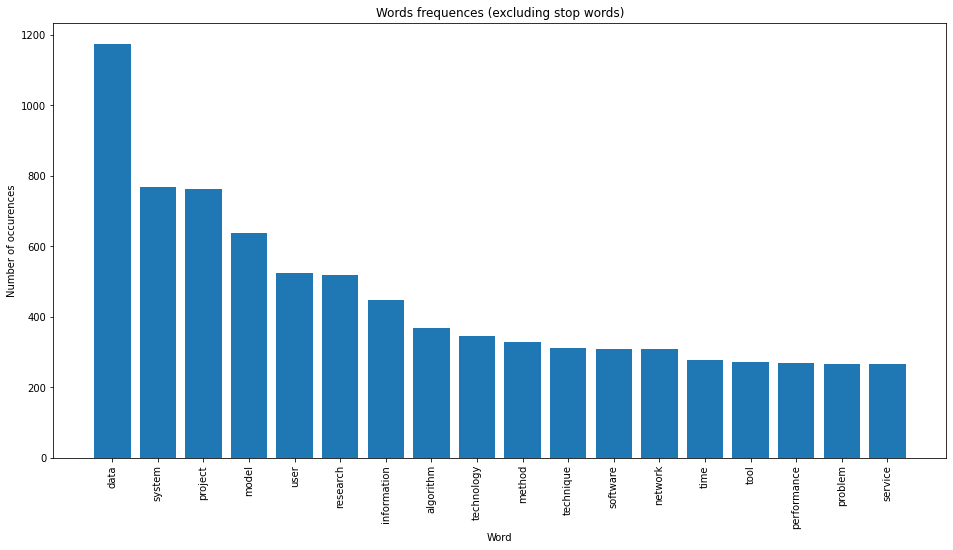

In [23]:
show_plot(0, 18)

In [24]:
number_of_docs =  len(data.columns)
upper_percent = 50
lower_percent = 2

In [25]:
remove_words = {'user', 'method', 'approach', 'result', 'model', 'data', 'problem', 'solution', 
'concept', 'task', 'work', 'process', 'step', 'goal', 'entity', 'aim', 'set', 'return', 'query', 'type','mission', 'knowledge','object', 'part', 'improvement','policy','insight', 
'frame','enhancement', 'measure', 'extraction', 'increase','factor', 'event', 'retrieval', 'book', 'version', 'ability', 'view',
 'stage', 'level', 'hair', 'subset', 'issue', 'custom', 'interest', 'show', 'g', 'gan', 'na', 'match', 'lack', 'ifit', 'million',
 'art', 'occurrence', 'student', 'capability', 'case', 'finding'}

In [26]:
important_words = {'robotics', 'cnn', 'machinelearning', 'kmeans', 'linguistic', 'aerospace', 'aircraft', 'logistics', 'transport', 
'timeseries', 'artificial', 'telematics', 'tomography', 'bert', 'gameplay', 'medicine', 'gaming', 'detector', 'forecast', 'robotic', 'android',
'genetic', 'statistic', 'cybersecurity', 'nlp', 'modelling', 'convolutional', 'textual'}

In [ ]:
k = 0
for word in words_frequences.keys():
    if words_frequences[word] >= number_of_docs * upper_percent / 100 or words_frequences[word] <= number_of_docs * lower_percent / 100:
        print(word, words_frequences[word])
        if word not in important_words:
            k += 1
            remove_words.add(word)
k

In [ ]:
tokenized_docs

In [45]:
len(remove_words)

6855

In [29]:
remove_words.update(adjectives)

In [ ]:
remove_words

In [ ]:
tokenized_docs

In [30]:
for i in adjectives:
    remove_words.add(i)

In [50]:
len(remove_words)

6975

In [31]:
for i in important_words:
    if i in remove_words:
        remove_words.remove(i)

In [49]:
sum = 0
for i in tokenized_docs:
    sum += len(i)
sum

64515

In [32]:
form_vocab()

In [33]:
len(vocab)

7429

In [34]:
remove_words.add('gain')
'gain' in remove_words

True

In [35]:
len(remove_words)

6969

In [36]:
for i in range(len(tokenized_docs)):
    for j in remove_words:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))
tokenized_docs

0       [algorithm, distribution, information, yield, ...
1       [neural_network, security, application, detect...
2       [gameplay, testing, computer, game, performanc...
3       [training, machine, training, parameter, time,...
4       [collaborative, recommendation, feedback, coll...
                              ...                        
1113    [end, business, document, language, rule, info...
1114    [document, intelligence, data_mining, source, ...
1115    [year, research, technology, quantum, computin...
1116    [stateoftheart, order, test, amount, movement,...
1117    [service, industry, purpose, resolution, maint...
Length: 1118, dtype: object

In [37]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
        if tokenized_docs[i][j] == 'ml':
            tokenized_docs[i][j] = 'machine_learning'
        elif tokenized_docs[i][j] == 'train':
            tokenized_docs[i][j] = 'training'

In [38]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
        if tokenized_docs[i][j] == 'nlu' or tokenized_docs[i][j] == 'nlg':
            tokenized_docs[i][j] = 'natural_language'

In [39]:
form_vocab()

In [40]:
len(vocab)

461

In [41]:
words_frequences = calc_frequences() 

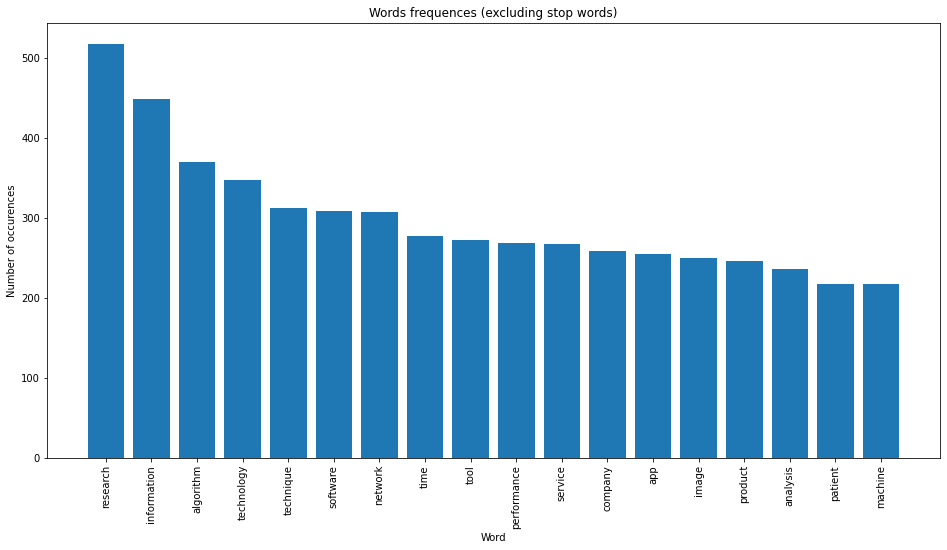

In [42]:
show_plot(0, 18)

In [43]:
same_base = {}
for word in list(vocab):
    ok = False
    for i in same_base.keys():
        if word[:5] == i[:5]:
            same_base[i].append(word)
            ok = True
            break
    if ok is False:
        same_base[word] = []

In [ ]:
for key in same_base.keys():
    if len(same_base[key]) != 0:
        print(key, same_base[key])

In [45]:
bad_keys = ['communication', 'marketing', 'experiment', 'consumption', 'advance', 'internship', 'contract', 'computer_vision']

In [46]:
same_base['product'] = ['production']
same_base['transport'] = ['transportation']
same_base['computing'] = ['computer', 'computation']

In [47]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
        for key in same_base.keys():
            if tokenized_docs[i][j] in same_base[key]:
                tokenized_docs[i][j] = key

In [48]:
form_vocab()

In [49]:
len(vocab)

376

In [50]:
words_frequences = calc_frequences() 

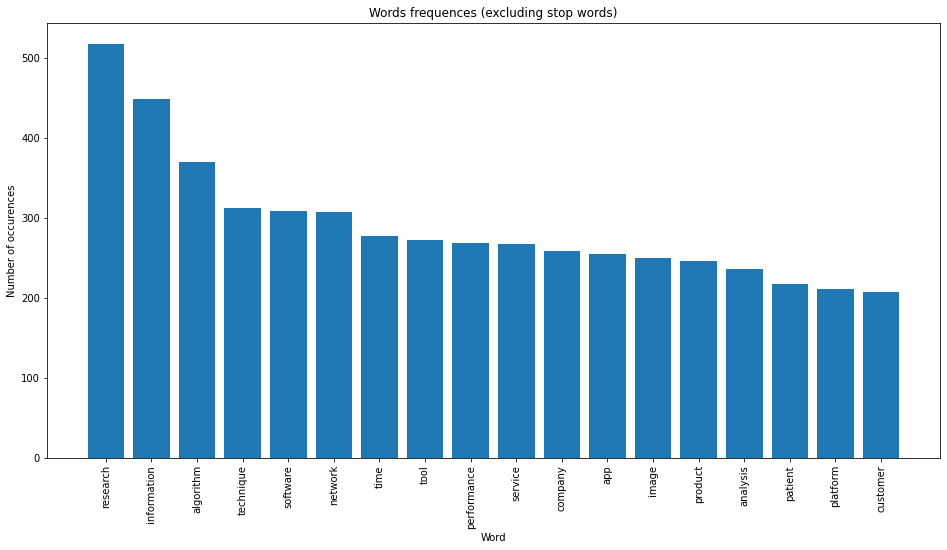

In [51]:
show_plot(0, 18)

In [ ]:
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

In [113]:
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

In [52]:
more_stop_words1 = ["style", "choice", 'participant',"complicated", 'project', 
'performance', 'time', 'item', 'completion', 'path', 
'difficulty', 'future_work', 'purpose', 'reason', 'attention', 'transfer', 
'area', 'change', 'scene', 'removal', 'output', 'address', 'state', 'article', 
'control', 'source', 'limitation', 'manner', 'year', 'removal', 'augmentation', 'world', 
'challenge', 'fence', 'obstruction', 'ground', 'condensate', 'ab', 'experience', 
'b', 'leverage', 'fluency', 'similarity', 'planning', 'extract', "question", "context","essay", 
"outcome", "educator", 'advance','failure', 'library', 'input', 'reconstruction', 'yield',
'utterance', 'okta', 'usage', 'cpc', 'possibility', 'theme',"contract", "node", 
"identification", "city", "inference", "gap", "way", "internship", "field","success",
"background","importance","capture","medium","point","goal_project","risk","impact","measurement",
"code", "amount", "size", "focus", "term", "range", "property", "history", "experimen", 
"people", "benefit", "technique","end","presence", "target", 'age', 'practice', 'variety', 
'profile', 'edge', 'relationship', 'map', 'module', 'accuracy', 'domain', 'feedback', 'partner', 
'skill', 'aspect', 'effect', 'additional', 'collection', 'action', 'study', 
'activity','thing','number','function','day', 'collection', 
'core', 'variation', 'company', "business",'scale', 'combination', 'access', 
'demand', 'person', 'framework', 'behavior', 'gain', 
'requirement', 'role', 'today', "quality", "generation", "hand", "response", 
"communication", "resource","error","order","life",'researcher',
'phase', 'rule', 'pattern', 'consumption', 'form', 'cost', 'research_project', 'information', 'technology', 'home', 'research',
'technical', 'interactive', 'scenario']
for i in range(len(tokenized_docs)):
    for j in more_stop_words1:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))
tokenized_docs

0       [algorithm, distribution, algorithm, algorithm...
1       [neural_network, security, application, detect...
2       [gameplay, testing, computer_vision, game, gra...
3       [training, machinelearning, training, paramete...
4       [collaborative, recommendation, collaborative,...
                              ...                        
1113    [document, language, document, language, commu...
1114    [document, intelligence, data_mining, document...
1115    [quantum, computer_vision, quantum, sensor, vo...
1116    [test, movement, test, efficient, test, proces...
1117    [service, industrial, resolution, maintenance,...
Length: 1118, dtype: object

In [53]:
form_vocab()

In [54]:
words_frequences = calc_frequences() 

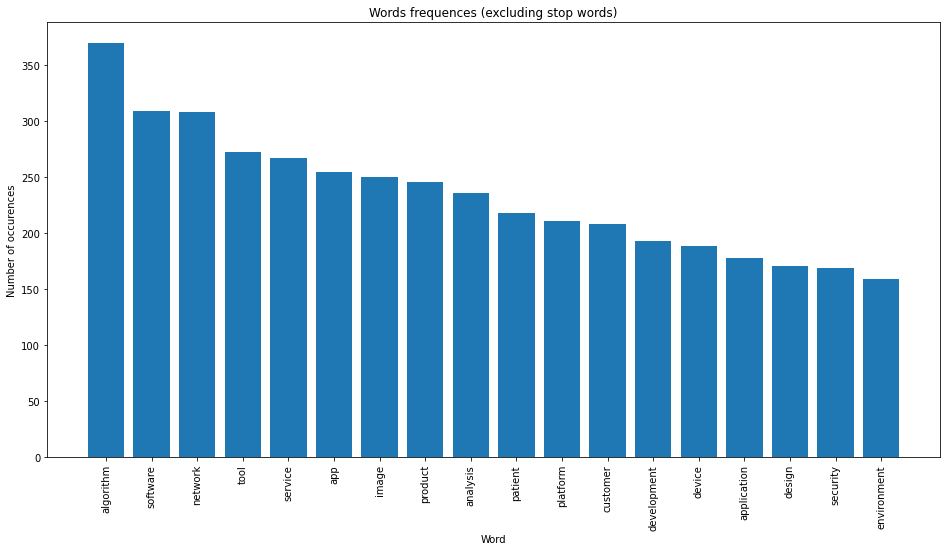

In [55]:
show_plot(0, 18)

In [56]:
for i in range(len(tokenized_docs)):
    for j in range(len(tokenized_docs[i])):
            if tokenized_docs[i][j] == 'graphql' or tokenized_docs[i][j] == 'cpc':
                tokenized_docs[i][j] = 'graph'

<h2> Clustering </h2>

In [57]:
from gensim.models import LdaModel, TfidfModel

<h3> LDA + Bert + Kmeans + Tsne </h3>

<p> Idea: Concatenated both LDA and Bert vectors with a weight hyperparameter to balance the relative importance of information from each source. </p>

In [7]:
from gensim.corpora import Dictionary

In [59]:
num_of_topics = 30

In [8]:
import torch
from transformers import BertTokenizer, BertModel

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
import pandas as pd
test = pd.Series(['my tree is green', 'ha lol aga'])

In [62]:
tokenized_docs = tokenized_docs.apply(lambda x: " ".join(x))

In [13]:
prepared_docs_for_tokenizer = test.apply(lambda x: "[CLS] " + x + " [SEP]")

In [14]:
bert_tokenized_docs = prepared_docs_for_tokenizer.apply(lambda x: tokenizer.tokenize(x))

In [15]:
len(bert_tokenized_docs)

2

In [16]:
bert_tokenized_docs

0     [[CLS], my, tree, is, green, [SEP]]
1    [[CLS], ha, lo, ##l, ag, ##a, [SEP]]
dtype: object

In [17]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(bert_tokenized_docs, show_progress_bar=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
embeddings.shape

(2, 768)

In [88]:
embeddings[0]

array([-1.47896695e+00,  1.75263248e-02,  2.04715058e-01, -5.77046990e-01,
        7.97752514e-02, -8.75277042e-01,  8.78899932e-01,  8.45390916e-01,
       -2.30961442e-01,  6.12980239e-02,  3.00351292e-01,  2.87109494e-01,
        2.41722971e-01, -8.25076222e-01,  1.50945159e-02, -5.37262082e-01,
        4.32986282e-02, -3.95690739e-01, -2.86500782e-01, -8.08891773e-01,
        1.02615857e+00, -2.70289153e-01, -5.38273692e-01,  1.08355451e+00,
       -3.19635808e-01,  7.80271459e-03,  5.68314433e-01, -2.15601087e-01,
       -2.82407463e-01,  4.19641793e-01,  1.76047117e-01, -6.63081855e-02,
        7.81631827e-01,  5.34273982e-01,  6.54432535e-01,  2.08934143e-01,
       -1.84107527e-01, -5.94903648e-01, -4.90490735e-01,  5.44363260e-03,
        5.06927013e-01,  1.37820154e-01,  2.33832031e-01, -8.95929635e-01,
       -4.81829166e-01,  1.76638335e-01, -1.59006000e+00,  7.60932803e-01,
       -1.60059965e+00, -1.09231734e+00, -4.21707958e-01,  5.05321503e-01,
        1.40967727e+00, -

In [68]:
from gensim.models import LdaModel
import numpy as np

tokenized_docs_splitted = tokenized_docs.apply(lambda x: x.split())
dictionary = Dictionary(tokenized_docs_splitted )
corpus = [dictionary.doc2bow(text) for text in tokenized_docs_splitted]
lda_model_bert = LdaModel(corpus=corpus, num_topics=num_of_topics, passes=40,
                                            iterations=300, 
                                            chunksize = 50, id2word=dictionary) 
n_doc = len(corpus)
vec_lda = np.zeros((n_doc, num_of_topics))
for i in range(len(corpus)):
    for topic, prob in lda_model_bert.get_document_topics(corpus[i]):
        vec_lda[i, topic] = prob
        

In [70]:
gamma = 15
vec_ldabert = np.c_[vec_lda * gamma, embeddings]

In [ ]:
vec_ldabert

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_of_topics)
y = kmeans.fit(vec_ldabert)

In [72]:
y.labels_

array([10,  9, 13, ...,  5,  2,  2])

In [73]:
y.cluster_centers_

array([[ 1.07639583e-01,  0.00000000e+00,  4.30871729e-01, ...,
        -3.10576473e-01,  6.95355209e-02, -4.62228078e-01],
       [ 2.93176026e-01, -4.33680869e-19,  6.05160814e-01, ...,
        -3.23680961e-01, -5.25412054e-02,  2.51674595e-01],
       [ 2.79118616e-01,  3.81679516e-03,  6.37694252e-01, ...,
        -4.09980633e-01, -2.04460787e-01, -1.96540643e-01],
       ...,
       [ 3.64162871e-01, -4.33680869e-19,  3.88732437e-01, ...,
        -4.75232650e-01, -1.15795162e-01, -1.95605967e-01],
       [ 4.44086043e-01, -6.50521303e-19,  7.10450380e-01, ...,
        -2.60268149e-01, -1.18350501e-01, -5.00777598e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.11022302e-16, ...,
        -6.67005062e-01,  7.13689208e-01, -5.61331622e-02]])

In [74]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(vec_ldabert)

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1118 samples in 0.002s...
[t-SNE] Computed neighbors for 1118 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1118
[t-SNE] Computed conditional probabilities for sample 1118 / 1118
[t-SNE] Mean sigma: 4.230733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.926529
[t-SNE] KL divergence after 1000 iterations: 0.892206


In [75]:
tsne_lda_centers = tsne_model.fit_transform(y.cluster_centers_)

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.001s...
[t-SNE] Computed neighbors for 30 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.902931
[t-SNE] KL divergence after 950 iterations: 0.563744


In [ ]:
tsne_lda_centers

In [ ]:
tsne_lda

In [78]:
kmeans_labels = {i: [] for i in range(0, num_of_topics)}
kmeans_centers = {i: 0 for i in range(0, num_of_topics)}
for i in range(len(y.labels_)):
    kmeans_labels[y.labels_[i]].append([tsne_lda[i][0], tsne_lda[i][1]])

In [79]:
for i in range(num_of_topics):
    kmeans_centers[i] = [tsne_lda_centers[i][0], tsne_lda_centers[i][1]]

In [80]:
max(y.labels_)

29

In [81]:
num_of_topics

30

In [83]:
type(tokenized_docs[0])

str

In [84]:
kmeans_texts = {i: [] for i in range(0, num_of_topics)}
kmeans_title = {i: [] for i in range(0, num_of_topics)}
for i in range(len(y.labels_)):
    kmeans_texts[y.labels_[i]].append(tokenized_docs[i])
    kmeans_title[y.labels_[i]].append(titles[i])

In [ ]:
kmeans_texts

In [123]:
kmeans_text_freqs = {i: {} for i in range(num_of_topics)}
for i in kmeans_texts.keys():
    for j in range(len(kmeans_texts[i])):
        key_words = kmeans_texts[i][j].split()
        for c in key_words:
            if kmeans_text_freqs[i].get(c) == None:
                kmeans_text_freqs[i][c] = 1
            else:
                kmeans_text_freqs[i][c] += 1


In [124]:
for i in kmeans_text_freqs:
    kmeans_text_freqs[i] = {k: v for k, v in sorted(kmeans_text_freqs[i].items(), key=lambda item: item[1], reverse=True)[:10]}

In [125]:
kmeans_text_freqs

{0: {'mobile_app': 18,
  'building': 17,
  'location': 12,
  'app': 11,
  'device': 11,
  'camera': 8,
  'development': 7,
  'analysis': 7,
  'partner_organization': 7,
  'enterprise': 6},
 1: {'internet': 75,
  'web': 35,
  'network': 33,
  'tool': 32,
  'security': 27,
  'device': 18,
  'product': 17,
  'community': 16,
  'app': 16,
  'design': 15},
 2: {'analysis': 69,
  'machinelearning': 44,
  'product': 38,
  'computer_vision': 34,
  'representation': 33,
  'healthcare': 33,
  'tool': 32,
  'network': 30,
  'recognition': 30,
  'software': 29},
 3: {'patient': 59,
  'medical': 28,
  'treatment': 22,
  'healthcare': 17,
  'machinelearning': 16,
  'cancer': 16,
  'image': 14,
  'hospital': 13,
  'algorithm': 12,
  'experiment': 12},
 4: {'computer_vision': 70,
  'security': 17,
  'industrial': 16,
  'software': 15,
  'algorithm': 14,
  'internet': 13,
  'product': 12,
  'application': 11,
  'network': 11,
  'device': 11},
 5: {'product': 41,
  'tool': 36,
  'development': 35,
  'an

In [126]:
def get_words(ind):
    s = ' '
    count = 0
    for k in kmeans_text_freqs[ind].keys():
        s += k + ", "
        count += 1
        if count == 10:
            s.rstrip(', ')
            break
    return s

In [127]:
c1 =  ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
        "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
        "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
        "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
        "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
        "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
        "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
        "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58"]

In [91]:
len(c1)

128

In [92]:
import csv

# open the file in the write mode
f = open('kmeans_bert_lda_19.csv', 'w')

# create the csv writer
writer = csv.writer(f)
writer.writerow(['Title', 'x', 'y', 'Topic'])

17

In [128]:
doc_topics_initial = []
se = set()
for i in range(num_of_topics):
    topic = get_words(i)
    for j in range(len(kmeans_labels[i])):
        p = {}
        if kmeans_title[i][j] in list(titles[:108]) and (kmeans_title[i][j] not in se):
            p['Topic'] = topic
            se.add(kmeans_title[i][j])
            p['Title'] = kmeans_title[i][j]
            p['Doc_keywords'] = kmeans_texts[i][j]
            doc_topics_initial.append(p)

In [129]:
df2 = pd.DataFrame(doc_topics_initial)
df2

,Topic,Title,Doc_keywords
0,"mobile_app, building, location, app, device, ...",snap analytics,mobile_app product enterprise development app ...
1,"mobile_app, building, location, app, device, ...",soti snap widget enhancements,mobile_app development maintenance app develop...
2,"mobile_app, building, location, app, device, ...",indoor geofence,mobile_app enterprise job device device locati...
3,"internet, web, network, tool, security, devic...",web page contextual subcomponents recognition ...,web page sentence efficient internet web page ...
4,"analysis, machinelearning, product, computer_...",using a temporal convolutional network for dem...,decision product loss decision product product...
...,...,...,...
103,"analysis, algorithm, complete, machinelearnin...",natural languagebased live video filtering proxy,intelligence analysis camera cloud processor s...
104,"analysis, algorithm, complete, machinelearnin...",material and lighting estimation based on d im...,deep_learning image training training neural_n...
105,"analysis, algorithm, complete, machinelearnin...",automated diagnostic solution for managing mob...,intelligence device signal analysis applicatio...
106,"robot, product, testing, environment, operato...",dampingbot learning to stabilize objects in ha...,robot speed reinforcement active robot positio...


In [116]:
doc_topics = []
se = set()
for i in range(num_of_topics):
    topic = get_words(i)
    for j in range(len(kmeans_labels[i])):
        p = {}
        if kmeans_title[i][j] in list(titles) and (kmeans_title[i][j] not in se):
            p['Topic'] = topic
            se.add(kmeans_title[i][j])
            p['Title'] = kmeans_title[i][j]
            p['Doc_keywords'] = kmeans_texts[i][j]
        doc_topics.append(p)

In [117]:
df1 = pd.DataFrame(doc_topics)
df1

,Topic,Title,Doc_keywords
0,"mobile_app, building, location,",snap analytics,mobile_app product enterprise development app ...
1,"mobile_app, building, location,",soti snap widget enhancements,mobile_app development maintenance app develop...
2,"mobile_app, building, location,",indoor geofence,mobile_app enterprise job device device locati...
3,"mobile_app, building, location,",novaxe novel online system for guitar music sc...,building graphic display position search algor...
4,"mobile_app, building, location,",reconstructing viewing parameters from images ...,aircraft aircraft mobile_app processor power c...
...,...,...,...
1113,"robot, product, testing,",design and optimization of the product platfor...,robot marketing robot complete component compl...
1114,"robot, product, testing,",study and development of energyefficient colla...,robot robot collaborative robot robot building...
1115,"robot, product, testing,",riskaware decision support systems for critica...,robot sensor network infrastructure app infras...
1116,"robot, product, testing,",acceptance testing framework for robotic softw...,robot hardware device internet natural_languag...


In [118]:
excel_file = 'sheet_kmeans_bert_lda_19.xlsx'
df1.to_excel(excel_file) 

In [119]:
excel_file = 'sheet_kmeans_initial_bert_lda_19.xlsx'
df2.to_excel(excel_file) 

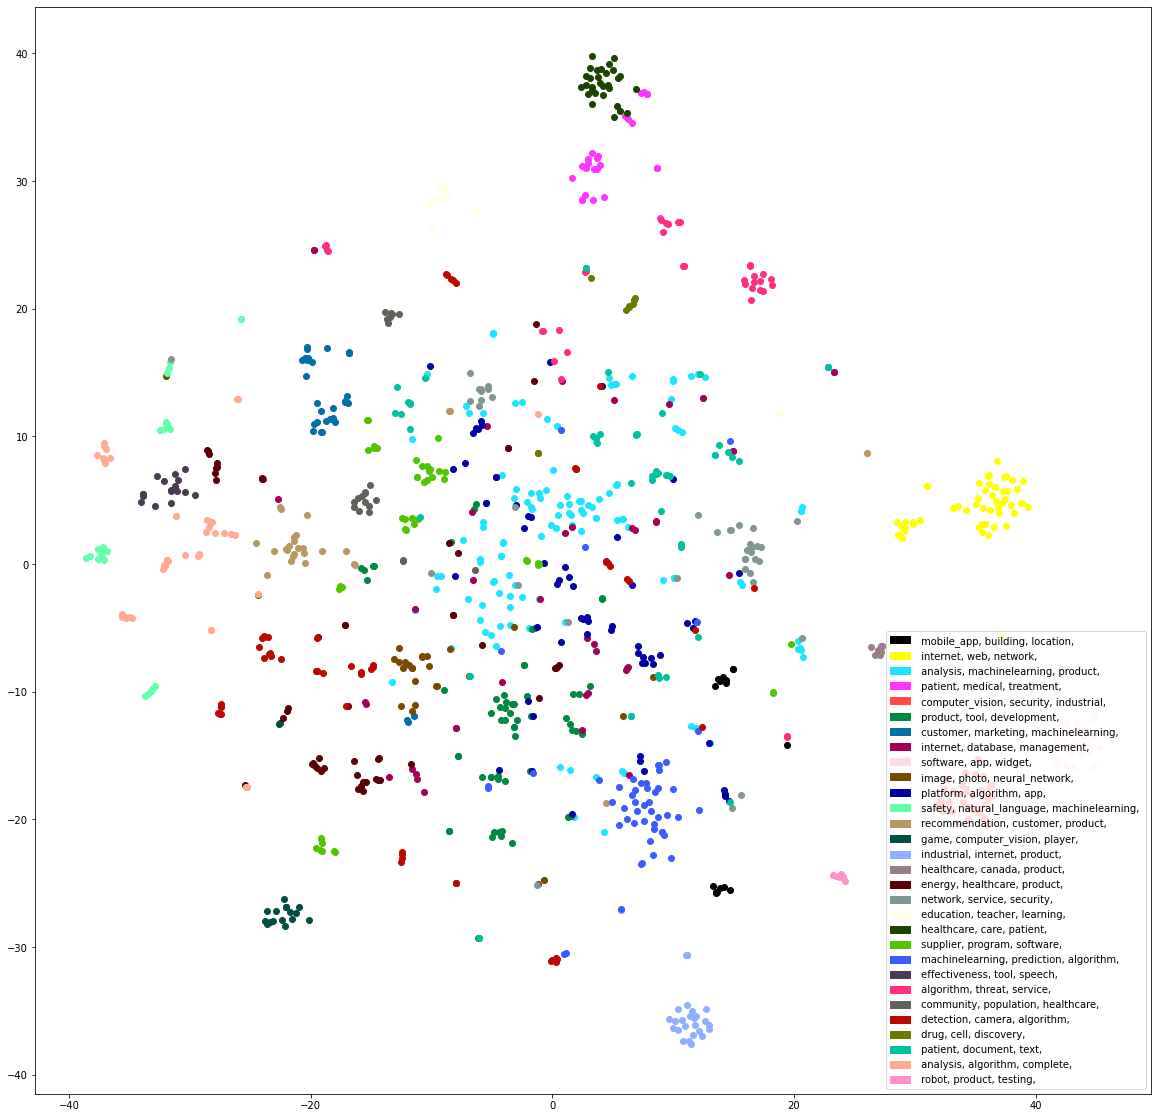

In [96]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize = (20,20))
patches = []
for i in range(num_of_topics):
    topic = get_words(i)
    patch = mpatches.Patch(color=c1[i], label=topic)
    patches.append(patch)
    for j in range(len(kmeans_labels[i])):
        if kmeans_title[i][j] in list(titles):
            ax.scatter(kmeans_labels[i][j][0], kmeans_labels[i][j][1], color=c1[i])
            writer.writerow([kmeans_title[i][j], kmeans_labels[i][j][0], kmeans_labels[i][j][1], topic])
    ax.legend(handles=patches, loc=4)
f.close()


<iframe title="25 topics" aria-label="Scatter Plot" id="datawrapper-chart-LVQsE" src="https://datawrapper.dwcdn.net/LVQsE/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="628"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>

<iframe title="30 topics" aria-label="Scatter Plot" id="datawrapper-chart-0ca6G" src="https://datawrapper.dwcdn.net/0ca6G/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="755"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>

<h3> Prediction </h3>

In [3]:
def predict(model_lda, new_text):
    tc = TextCleaner()
    new_text = tc.text_cleaning(new_text).split()
    new_text_corpus =  dictionary.doc2bow(new_text)
    vec_lda_predict = np.zeros((1, num_of_topics))
    for topic, prob in model_lda.get_document_topics(new_text_corpus):
        vec_lda_predict[0, topic] = prob
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_text_to_predict = "[CLS] " + " ".join(new_text) + " [SEP]"
    hah_predict = tokenizer_bert.tokenize(bert_text_to_predict)
    hah_predict = pd.Series([hah_predict])

    bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
    embeddings_predict = bert_model.encode(hah_predict, show_progress_bar=True)
    
    vec_ldabert_predict = np.c_[vec_lda_predict * gamma, embeddings_predict]
    kmeans_model = pickle.load(open("lda_bert_kmeans_tsne/model19/kmeans_model.pkl", "rb"))
    predict_cluster = kmeans_model.predict(vec_ldabert_predict)
    return predict_cluster

In [2]:
new_text = '''The aim of the project is to create a model that generates a latent semantic representation for query and retrieved passages.
 The results are then ranked by the similarity scores of the passage representations to the query representation. The experimental 
 architectures were built using Recurrent Neural Networks (Bi-LSTMs), attention, and legal embeddings. They were then trained with 
 a custom loss function, which pushes the most semantically similar passages as the top-K results. These architectures and loss 
 function can be generalised for Learning to Rank objective in any Information Retrieval (IR) domain.'''

In [1]:
saved_directory_path = 'lda_bert_kmeans_tsne/model19/'

In [100]:
import uuid
import os 
import pickle

lda_model_bert.save(f'{saved_directory_path}lda_model/lda.model')
pickle.dump(kmeans, open(saved_directory_path + "kmeans_model.pkl", "wb"))

In [4]:
result = predict(lda_model_bert, new_text)
result

NameError: name 'lda_model_bert' is not defined

In [ ]:
#!pip install sentence_transformers

<h3> Trying pure LDA </h3>

In [ ]:
num_of_topics = 15
file_name_doc_top = 'document-topic_15_topics_3.xlsx'
file_name_top_repr = 'topic_representation_of_docs_15_topics_3.xlsx'

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel
from gensim.models.coherencemodel import CoherenceModel
#use tf-idf
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [ ]:
def calculate_coherence_score(n, coh_score):
    lda_model = LdaModel(corpus=corpus, num_topics=n, passes=20,
                                            iterations=300, 
                                            chunksize = 50, id2word=dictionary) 
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence=coh_score)
    coherence_lda = coherence_model_lda.get_coherence()
    return (coherence_lda, lda_model)

In [ ]:
n = [20, 25, 30]
alpha = ['asymmetric', 'symmetric', 'auto', 0.1, 0.4, 0.6, 0.7]
betta = ['symmetric', 'auto', 0.1, 0.4, 0.6, 0.7]
x = []
for i in n:
    for a in alpha:
        for b in betta:
            x.append(i)

In [ ]:
n = [i for i in range(10, 40)]
coherence_values_lda = {}
y = []
alpha = ['asymmetric', 'symmetric', 'auto', 0.1, 0.4, 0.6, 0.7]
betta = ['symmetric', 'auto', 0.1, 0.4, 0.6, 0.7]
min = 15
x = []
for i in n:
    coh = calculate_coherence_score(i, 'u_mass')
    coherence_values_lda[coh[0]] = coh[1]
    y.append(coh[0])
    if coh[0] < min:
        min = coh[0]
    print(i, coh)

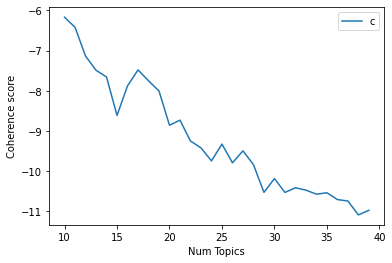

In [ ]:
plt.plot(n, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
min

-11.08620347841254

In [ ]:
lda_model = coherence_values_lda[min]

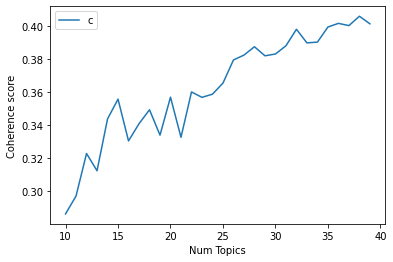

In [ ]:
y = [x[0] for x in coherence_values]
plt.plot(n, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
n = [i for i in range(10, 40)]
coherence_values = []
for i in n:
    coh = calculate_coherence_score(i, 'c_v')
    coherence_values.append(coh)
    print(i, coh)
plt.plot(n, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def get_coh(model, coh_score):
    coherence_model_lda = CoherenceModel(model=model, texts=tokenized_docs, dictionary=dictionary, coherence=coh_score)
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

In [402]:
lda_model = LdaModel(corpus=corpus, num_topics=num_of_topics, passes=40,
                                            iterations=300, 
                                            chunksize = 50, id2word=dictionary) 

In [ ]:
get_coh(lda_model, 'u_mass')

-9.296459247152711

In [96]:
lda_model.print_topics()

[(0,
  '0.192*"image" + 0.119*"database" + 0.099*"camera" + 0.081*"information" + 0.062*"processing" + 0.057*"volume" + 0.055*"website" + 0.048*"opportunity" + 0.047*"deep_learning" + 0.041*"user_experience"'),
 (1,
  '0.276*"product" + 0.224*"customer" + 0.186*"recommendation" + 0.072*"component" + 0.041*"information" + 0.039*"experiment" + 0.038*"purchase" + 0.038*"storage" + 0.034*"email" + 0.016*"estimation"'),
 (2,
  '0.098*"application" + 0.079*"security" + 0.071*"platform" + 0.058*"infrastructure" + 0.058*"computer_vision" + 0.051*"mobile_device" + 0.050*"developer" + 0.048*"robotic" + 0.043*"location" + 0.042*"information"'),
 (3,
  '0.221*"healthcare" + 0.096*"information" + 0.071*"decision" + 0.054*"analysis" + 0.052*"privacy" + 0.041*"service" + 0.033*"representation" + 0.030*"imaging" + 0.030*"store" + 0.029*"group"'),
 (4,
  '0.294*"natural_language" + 0.285*"text" + 0.144*"disease" + 0.106*"classification" + 0.061*"diagnosis" + 0.039*"graph" + 0.031*"label" + 0.011*"bert"

In [95]:
lda_model = LdaModel.load('lda_models/lda_model_20_topics_3/lda.model')

In [ ]:
print('c_v:', get_coh(lda_model, 'c_v'))
print('u_mass:', get_coh(lda_model, 'u_mass'))


c_v: 0.4203632201749937
u_mass: -8.473737993362695


In [ ]:
lda_model.show_topic(1)

[('change', 0.09515191),
 ('measurement', 0.054821763),
 ('loss', 0.04341777),
 ('network', 0.032722626),
 ('minibatches', 0.031567056),
 ('minibatch', 0.031567056),
 ('reuse', 0.028118046),
 ('throughput', 0.025966093),
 ('bottleneck', 0.025965676),
 ('protocol', 0.023815656)]

In [ ]:
words_of_topics = { tid: [(dictionary[wid], s) for (wid, s) in lda_model.get_topic_terms(tid, topn=20)] for tid in range(num_of_topics) }

In [ ]:
unique_topics = set()
for i in lda_model.print_topics():
    unique_topics.add(i[1])

In [ ]:
for i in unique_topics:
    print(i)
    print()

0.222*"product" + 0.127*"researcher" + 0.107*"decision" + 0.085*"engineering" + 0.076*"quality" + 0.071*"demand" + 0.058*"industrial_partner" + 0.043*"rate" + 0.038*"group" + 0.029*"forecast"

0.173*"app" + 0.103*"researcher" + 0.088*"platform" + 0.085*"communication" + 0.071*"management" + 0.049*"mobile_device" + 0.035*"variety" + 0.034*"developer" + 0.032*"support" + 0.029*"plan"

0.219*"image" + 0.144*"effect" + 0.083*"practice" + 0.071*"neural_network" + 0.070*"reality" + 0.065*"space" + 0.052*"training" + 0.050*"profile" + 0.050*"position" + 0.035*"parameter"

0.003*"profile" + 0.003*"storage" + 0.003*"variety" + 0.003*"transport" + 0.003*"mobile_device" + 0.003*"resolution" + 0.003*"person" + 0.003*"search" + 0.003*"age" + 0.003*"privacy"

0.221*"customer" + 0.192*"recommendation" + 0.096*"behavior" + 0.094*"volume" + 0.081*"product" + 0.070*"website" + 0.063*"information" + 0.042*"gain" + 0.040*"purchase" + 0.036*"email"

0.143*"artificial_intelligence" + 0.142*"industrial_partn

In [ ]:
import uuid
import os 

lda_model.save(f'lda_models/lda_model_20_topics_3/lda.model')

In [ ]:
docTopicProbMat = lda_model[corpus]
for topic in docTopicProbMat:
    for i in topic:
        if i[0] == 15:
            print(topic)

In [ ]:
!pip install 'pyLDAvis==3.2.1'

ERROR: Invalid requirement: "'pyLDAvis==3.2.1'"
You should consider upgrading via the 'c:\users\марія\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [93]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
vis

ModuleNotFoundError: No module named 'pyLDAvis.gensim_models'

In [ ]:
def format_topics_sentences():
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                topic_keywords = ", ".join([word + ":" + str(round(prop,4)) for word, prop in words_of_topics[topic_num]])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(tokenized_docs)
    sent_topics_df['Keywords'] = contents
    sent_topics_df['Title'] = df['title']
    sent_topics_df['company'] = df['company']
    return(sent_topics_df)

In [ ]:
def top_docs(n):
    top_docs_for_topic1 = {i : [] for i in range(0, n)}
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            topic_keywords = ", ".join([word + ":" + str(round(prop,4)) for word, prop in words_of_topics[topic_num]])
            top_docs_for_topic1[int(topic_num)].append((topic_keywords, round(prop_topic,4), i, data[i]))
    return top_docs_for_topic1


In [ ]:
tokenized_docs

0      [bandit, algorithm, gain, reward, distribution...
1      [neural_network, security, application, car, d...
2      [gameplay, testing, computer, game, cost, rein...
3      [training, machine, datasets, minibatches, tra...
4      [recommender_system, feedback, recommender_sys...
                             ...                        
103    [position, personalization, body, activity, re...
104    [customer, paper, business, building, mobile_a...
105    [automation, asr, system, text, language, lm, ...
106    [tool, company, support, integration, service,...
107    [framework, representation, learning, training...
Name: abstract, Length: 108, dtype: object

In [ ]:
df_topic_sents_keywords = format_topics_sentences()

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['index', 'Topic_No',  'Topic_Perc_Contrib', 'Dominant_Topic', 'Keywords', 'Title', 'company']
df_dominant_topic = df_dominant_topic.drop('index', 1)

df_dominant_topic.to_excel(file_name_doc_top)

df_dominant_topic.head(10)

,Topic_No,Topic_Perc_Contrib,Dominant_Topic,Keywords,Title,company
0,6.0,0.5525,"algorithm:0.9104, evaluation:0.0637, message:1...","[algorithm, distribution, information, algorit...",adapting contextual bandit algorithms to adser...,[24]7.ai
1,8.0,0.2643,"machinelearning:0.426, artificial_intelligence...","[neural_network, security, application, detect...",defending white box adversarial examples with ...,AMD
2,5.0,0.6344,"marketing:0.1471, game:0.1323, prediction:0.09...","[gameplay, testing, computer_vision, game, rei...",modern gameplay test automation with reinforce...,AMD
3,8.0,0.4172,"machinelearning:0.426, artificial_intelligence...","[training, machinelearning, dataset, training,...",reducing data loading time in machine learning...,AMD
4,1.0,0.3874,"product:0.2762, customer:0.2235, recommendatio...","[recommendation, recommendation, app, informat...",hybrid recommender system for applications bas...,AppDirect
5,5.0,0.3793,"marketing:0.1471, game:0.1323, prediction:0.09...","[application, analysis, security, testing, pro...",apifuzz introspection assisted fuzzer for qnx ...,BlackBerry
6,2.0,0.6849,"application:0.0981, security:0.0794, platform:...","[software, complexity, component, developer, s...",taking the first steps towards building a hard...,BlackBerry
7,10.0,0.2461,"tool:0.1229, software:0.1174, analysis:0.0936,...","[experiment, education, software, platform, ma...",automated domain specific essay scoring,Blees
8,3.0,0.6994,"healthcare:0.2213, information:0.0959, decisio...","[healthcare, imaging, analysis, healthcare, st...",secure crossservice genomic data federated ana...,CanDIG
9,8.0,0.2785,"machinelearning:0.426, artificial_intelligence...","[management, report, deep_learning, dataset, n...",forecasting future fundamental metrics from ea...,CPP


In [ ]:
top_docs_topic = top_docs(num_of_topics)

In [ ]:
df.iloc[39, 1]

'speech enhancement and recognition with generative adversarial network'

In [ ]:
df.iloc[1, 0]

'defending white box adversarial examples with a guided denoiser'

In [ ]:
df.iloc[doc[2], 1]

'using social network analysis in marketing'

In [ ]:
new_df = pd.DataFrame(columns=['Topic', 'topic_words', 'topic_impact', 'doc_title', 'doc_key_words'])
for topic in top_docs_topic.keys():
    top_docs_topic[topic] = sorted(top_docs_topic[topic], reverse=True)[:5]
    first = True
    for doc in top_docs_topic[topic]:
        if first:
            new_df = new_df.append({'Topic': topic, 'topic_words': doc[0], 'topic_impact': doc[1], 'doc_title': df.iloc[doc[2], 1], 'doc_key_words': ", ".join(tokenized_docs[doc[2]][:15])}, ignore_index=True)
            first = False
        else:
            new_df = new_df.append({'Topic': '', 'topic_words': '', 'topic_impact': doc[1], 'doc_title': df.iloc[doc[2], 1], 'doc_key_words': ", ".join(tokenized_docs[doc[2]][:15])}, ignore_index=True)

In [ ]:
new_df

,Topic,topic_words,topic_impact,doc_title,doc_key_words
0,0,"image:0.1917, database:0.1191, camera:0.0987, ...",0.8265,learning tone curves for local image enhancement,"image, image, image, image, image, camera, ima..."
1,,,0.7893,design choices for fast and accurate d face re...,"image, parameter, image, parameter, image, spa..."
2,,,0.7474,coregistration of nuclear medicine images with...,"image, image, medicine, image, image, informat..."
3,,,0.6962,natural language interface for ad hoc queries ...,"database, information, database, database, nat..."
4,,,0.6915,learning depth from transmissive diffraction m...,"camera, information, representation, camera, i..."
...,...,...,...,...,...
95,19,"line:0.0039, statistic:0.0039, integration:0.0...",0.0250,measured and perceived differences between wri...,"device, device, device, device, understanding,..."
96,,,0.0250,isobody leisure codes creating a new standard ...,"logistics, body, body, body, algorithm"
97,,,0.0250,multihost firmware for tci controller,"computer_vision, andor"
98,,,0.0250,from data cleaning design and migration to por...,environment


In [ ]:
new_df.to_excel(file_name_top_repr)

In [ ]:
for i, row_list in enumerate(lda_model[corpus]):
    print(row_list)

[(2, 0.09926986), (3, 0.14138834), (6, 0.5525077), (8, 0.10249946), (15, 0.066834085)]
[(0, 0.21231873), (2, 0.12058753), (4, 0.061763387), (8, 0.26415345), (12, 0.0617649), (14, 0.061764486), (16, 0.17941187)]
[(0, 0.07493742), (3, 0.11935216), (5, 0.6344105), (10, 0.029480267), (11, 0.025967928), (15, 0.049998727), (16, 0.04999889)]
[(0, 0.2550008), (6, 0.058333967), (8, 0.41722605), (15, 0.1390813), (17, 0.08869063)]
[(0, 0.06083507), (1, 0.3873371), (2, 0.18141086), (4, 0.040380307), (8, 0.055279236), (10, 0.051108688), (11, 0.040384445), (16, 0.0788467), (17, 0.08326338)]
[(2, 0.18235031), (5, 0.37929365), (10, 0.28418913), (11, 0.08749974)]
[(1, 0.094626635), (2, 0.6849245), (3, 0.026244529), (10, 0.15478162), (12, 0.023118133)]
[(4, 0.18635643), (5, 0.09771837), (8, 0.09545816), (10, 0.24622728), (11, 0.095451005), (15, 0.2151497)]
[(3, 0.69937664), (8, 0.20562382), (13, 0.052499294)]
[(0, 0.20697986), (2, 0.14135817), (3, 0.080766), (4, 0.08077243), (8, 0.27859008), (10, 0.0807